**1. Data Loading and Preprocessing**

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving vgsales.csv to vgsales.csv


In [ ]:
# Remove all rows containing 0 or NaN values from the dataset

import pandas as pd

# Example: assuming your dataset is named df
# Step 1: Drop rows with any NaN values
df = df.dropna()

# Step 2: Drop rows where any column has value 0
df = df[(df != 0).all(axis=1)]

# Check remaining data
print(df.shape)
df.head()


(16540, 4)


,Platform,Genre,Global_Sales,Publisher
0,Wii,Sports,82.74,Nintendo
1,NES,Platform,40.24,Nintendo
2,Wii,Racing,35.82,Nintendo
3,Wii,Sports,33.00,Nintendo
4,GB,Role-Playing,31.37,Nintendo


In [ ]:
import pandas as pd

df = pd.read_csv(next(iter(uploaded)))
print(df.shape)
print(df.columns)
df.head()

(16598, 11)
Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
# Keep only the required columns
df = df[['Platform', 'Genre', 'Global_Sales', "Publisher"]]

# Check the result
print(df.shape)
df.head()


(16598, 4)


,Platform,Genre,Global_Sales,Publisher
0,Wii,Sports,82.74,Nintendo
1,NES,Platform,40.24,Nintendo
2,Wii,Racing,35.82,Nintendo
3,Wii,Sports,33.00,Nintendo
4,GB,Role-Playing,31.37,Nintendo


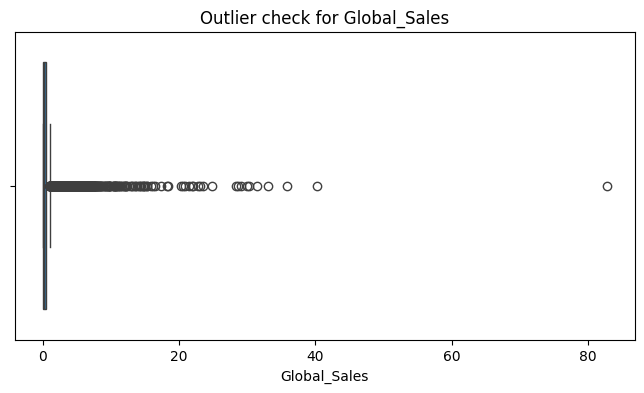

count    16598.000000
mean         0.537441
std          1.555028
min          0.010000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.740000
Name: Global_Sales, dtype: float64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check distribution and outliers
plt.figure(figsize=(8,4))
sns.boxplot(x=df['Global_Sales'])
plt.title('Outlier check for Global_Sales')
plt.show()

# Display statistical summary
print(df['Global_Sales'].describe())


In [ ]:
# Remove outliers using IQR method
Q1 = df['Global_Sales'].quantile(0.25)
Q3 = df['Global_Sales'].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the dataset
df_no_outliers = df[(df['Global_Sales'] >= lower_bound) & (df['Global_Sales'] <= upper_bound)]

print("Before:", df.shape)
print("After:", df_no_outliers.shape)
df_no_outliers.describe()

Before: (16598, 4)
After: (14705, 4)


,Global_Sales
count,14705.000000
mean,0.231474
std,0.242468
min,0.010000
25%,0.050000
50%,0.140000
75%,0.330000
max,1.080000


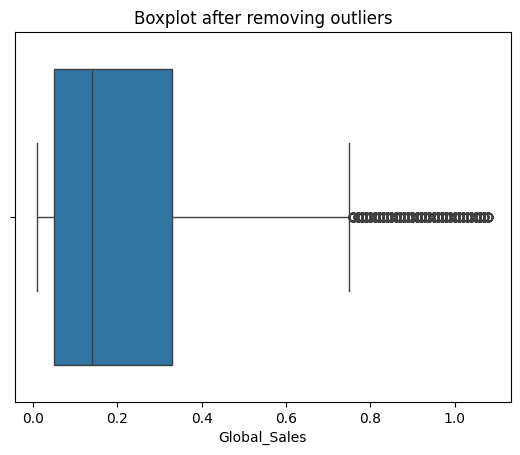

In [ ]:
import seaborn as sns

sns.boxplot(x=df_no_outliers['Global_Sales'])
plt.title('Boxplot after removing outliers')
plt.show()


Before: (14705, 4)
After: (14544, 4)


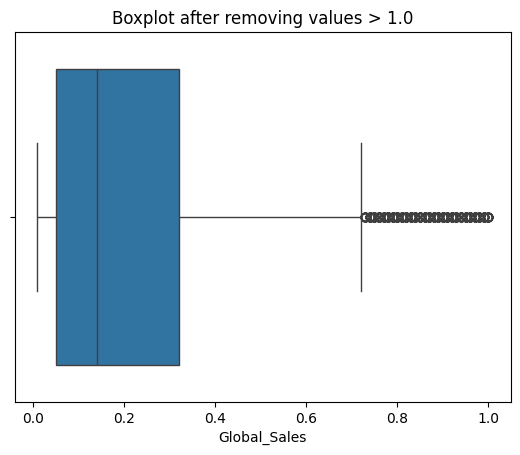

In [ ]:
df_clean = df_no_outliers[df_no_outliers['Global_Sales'] <= 1.0]

print("Before:", df_no_outliers.shape)
print("After:", df_clean.shape)

import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df_clean['Global_Sales'])
plt.title('Boxplot after removing values > 1.0')
plt.show()


Before: (14705, 4)
After: (11820, 4)


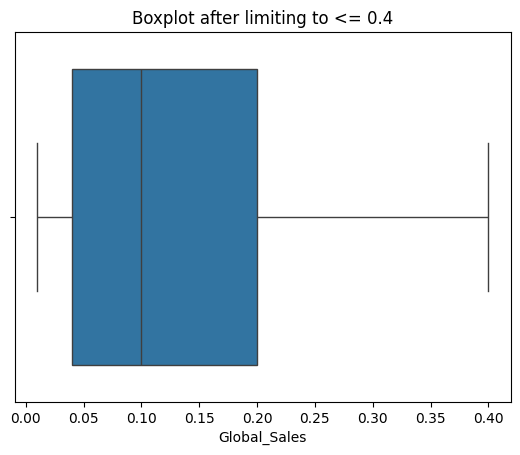

In [ ]:
df_realistic = df_no_outliers[df_no_outliers['Global_Sales'] <= 0.4]

print("Before:", df_no_outliers.shape)
print("After:", df_realistic.shape)

import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df_realistic['Global_Sales'])
plt.title('Boxplot after limiting to <= 0.4')
plt.show()

In [ ]:
print(df.columns.tolist())

['Platform', 'Genre', 'Global_Sales', 'Publisher']


In [ ]:
from google.colab import files

# Save the DataFrame to a CSV file
df.to_csv('filtered_games_dataset_with_publisher.csv', index=False)

# Download it to your computer
files.download('filtered_games_dataset_with_publisher.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**2. ML - Auto Gluon**

In [ ]:
from google.colab import files
import pandas as pd

# Upload the file from your computer
uploaded = files.upload()

# Load it into a DataFrame
df = pd.read_csv('filtered_games_dataset_with_publisher.csv')

# Check that everything loaded correctly
print(df.shape)
print(df.columns.tolist())
df.head()

Saving filtered_games_dataset_with_publisher.csv to filtered_games_dataset_with_publisher (1).csv
(16598, 4)
['Platform', 'Genre', 'Global_Sales', 'Publisher']


,Platform,Genre,Global_Sales,Publisher
0,Wii,Sports,82.74,Nintendo
1,NES,Platform,40.24,Nintendo
2,Wii,Racing,35.82,Nintendo
3,Wii,Sports,33.00,Nintendo
4,GB,Role-Playing,31.37,Nintendo


In [ ]:
median_value = df['Global_Sales'].median()
print("Median Global_Sales:", round(median_value, 3))

Median Global_Sales: 0.17


In [ ]:
# 1️⃣ Calculate the median
threshold = df['Global_Sales'].median()
print("Threshold (median):", round(threshold, 3))

# 2️⃣ Add a new column 'Sales_Category'
df['Sales_Category'] = df['Global_Sales'].apply(lambda x: 'good' if x > threshold else 'bad')

# 3️⃣ Check the class balance
print(df['Sales_Category'].value_counts(normalize=False))
print("\nClass proportions:")
print(df['Sales_Category'].value_counts(normalize=True))

Threshold (median): 0.17
Sales_Category
bad     8392
good    8206
Name: count, dtype: int64

Class proportions:
Sales_Category
bad     0.505603
good    0.494397
Name: proportion, dtype: float64


In [ ]:
# 1) Install AutoGluon (only needs to run once per session)
!pip install autogluon --quiet

# 2) Imports
from autogluon.tabular import TabularPredictor
from sklearn.metrics import classification_report

# 3) Select features and target
features = ['Platform', 'Genre', 'Publisher']
target = 'Sales_Category'  # already created using the median threshold

# 4) Train/test split (80% train, 20% test)
train_data = df.sample(frac=0.8, random_state=42)
test_data  = df.drop(train_data.index)

# 5) Train AutoGluon
# We use eval_metric='f1' so it balances precision and recall.
predictor = TabularPredictor(
    label=target,
    eval_metric='f1'
).fit(
    train_data[features + [target]],
    presets='best_quality',
    time_limit=180
)

# 6) Evaluate using AutoGluon's default decision threshold
results = predictor.evaluate(test_data[features + [target]])

# 7) Detailed classification report (precision, recall, f1 per class)
preds = predictor.predict(test_data[features])
print(classification_report(test_data[target], preds))

# 8) Optional: leaderboard of all tried models
leaderboard = predictor.leaderboard(test_data, silent=True)
leaderboard

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 20.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.1/225.1 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 454.9/454.9 kB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.3/487.3 kB 34.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.7/189.7 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.0/71.0 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 11.6 MB/s eta 0:0

No path specified. Models will be saved in: "AutogluonModels/ag-20251026_162238"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.4.0
Python Version:     3.12.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Thu Oct  2 10:42:05 UTC 2025
CPU Count:          2
Memory Avail:       11.20 GB / 12.67 GB (88.4%)
Disk Space Avail:   61.61 GB / 107.72 GB (57.2%)
Presets specified: ['best_quality']
Using hyperparameters preset: hyperparameters='zeroshot'
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_l

              precision    recall  f1-score   support

         bad       0.78      0.57      0.66      1693
        good       0.65      0.83      0.73      1627

    accuracy                           0.70      3320
   macro avg       0.72      0.70      0.70      3320
weighted avg       0.72      0.70      0.69      3320



,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBM_BAG_L1,0.730904,0.734524,f1,0.226230,0.171938,36.591749,0.226230,0.171938,36.591749,1,True,2
1,WeightedEnsemble_L3,0.730904,0.734524,f1,0.227832,0.179085,36.846742,0.001601,0.007147,0.254992,3,True,4
2,WeightedEnsemble_L2,0.730904,0.734524,f1,0.228198,0.180107,36.862711,0.001968,0.008168,0.270962,2,True,3
3,LightGBMXT_BAG_L1,0.730416,0.730018,f1,1.816363,1.653682,56.384797,1.816363,1.653682,56.384797,1,True,1


In [ ]:
from sklearn.metrics import classification_report

# Evaluate the AutoGluon model on test data
y_true = test_data[target]                          # true labels
y_pred = predictor.predict(test_data[features])     # predicted labels

# Generate detailed evaluation report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

         bad       0.78      0.57      0.66      1693
        good       0.65      0.83      0.73      1627

    accuracy                           0.70      3320
   macro avg       0.72      0.70      0.70      3320
weighted avg       0.72      0.70      0.69      3320



**3. Feuture Engineering**

In [ ]:
from google.colab import files
import pandas as pd

# === Upload the file ===
uploaded = files.upload()

# === Load it into a DataFrame ===
df = pd.read_csv(list(uploaded.keys())[0])

# === Check structure ===
print(df.shape)
print(df.columns.tolist())
df.head()


In [ ]:
import pandas as pd

# 1) Popularity-style numeric features
# For each row, we add the average sales historically for that Publisher / Genre / Platform.
# Idea: a big publisher (like Nintendo) usually sells more than a random small publisher.

df['Publisher_avg_sales'] = df.groupby('Publisher')['Global_Sales'].transform('mean')
df['Genre_avg_sales'] = df.groupby('Genre')['Global_Sales'].transform('mean')
df['Platform_avg_sales'] = df.groupby('Platform')['Global_Sales'].transform('mean')

# 2) Interaction / combo features (categorical)
# We combine columns to capture effects like:
# - Some genres sell better on certain platforms (Platform_Genre)
# - Some publishers dominate specific platforms (Platform_Publisher)
# - Some publishers are strong in specific genres (Genre_Publisher)

df['Platform_Genre'] = df['Platform'] + "_" + df['Genre']
df['Platform_Publisher'] = df['Platform'] + "_" + df['Publisher']
df['Genre_Publisher'] = df['Genre'] + "_" + df['Publisher']

# 3) Rank-style features (numeric)
# We convert the average sales signals above into rank scores.
# Lower rank number = generally stronger / higher-selling group.

df['Publisher_rank'] = df['Publisher_avg_sales'].rank(ascending=False)
df['Genre_rank'] = df['Genre_avg_sales'].rank(ascending=False)
df['Platform_rank'] = df['Platform_avg_sales'].rank(ascending=False)

# 4) Quick sanity check

print(df.shape)        # number of rows and columns after feature engineering
print(df.columns.tolist())  # all available features now
df.head()              # preview first 5 rows


In [ ]:
# === 1. Calculate median ===
threshold = df['Global_Sales'].median()
print("Median (threshold):", threshold)

# === 2. Create Sales_Category column based on that threshold ===
df['Sales_Category'] = df['Global_Sales'].apply(lambda x: 'good' if x > threshold else 'bad')

# === 3. Check balance between classes ===
print(df['Sales_Category'].value_counts(normalize=False))
print("\nClass proportions:")
print(df['Sales_Category'].value_counts(normalize=True))

In [ ]:
# 1️⃣ Save your DataFrame as CSV in Colab’s working directory
df.to_csv('video_game_sales_final.csv', index=False)

# 2️⃣ Download it to your computer
from google.colab import files
files.download('video_game_sales_final.csv')

NameError: name 'df' is not defined

**4. Auto Gluon + Feuture Engineering**

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Project 1. Video Game Sales Analysis/video_game_sales_final.csv')
df.head()

,Platform,Genre,Global_Sales,Publisher,Publisher_avg_sales,Genre_avg_sales,Platform_avg_sales,Platform_Genre,Platform_Publisher,Genre_Publisher,Publisher_rank,Genre_rank,Platform_rank,Sales_Category
0,Wii,Sports,82.74,Nintendo,2.563836,0.568247,0.705279,Wii_Sports,Wii_Nintendo,Sports_Nintendo,351.5,6004.5,4096.5,good
1,NES,Platform,40.24,Nintendo,2.563836,0.947577,2.561939,NES_Platform,NES_Nintendo,Platform_Nintendo,351.5,438.0,146.5,good
2,Wii,Racing,35.82,Nintendo,2.563836,0.593273,0.705279,Wii_Racing,Wii_Nintendo,Racing_Nintendo,351.5,4240.0,4096.5,good
3,Wii,Sports,33.00,Nintendo,2.563836,0.568247,0.705279,Wii_Sports,Wii_Nintendo,Sports_Nintendo,351.5,6004.5,4096.5,good
4,GB,Role-Playing,31.37,Nintendo,2.563836,0.628456,2.622887,GB_Role-Playing,GB_Nintendo,Role-Playing_Nintendo,351.5,2892.5,49.0,good


In [24]:
# === Install AutoGluon (if not installed) ===
!pip install autogluon --quiet

# === Import ===
from autogluon.tabular import TabularPredictor

# === Select features and target ===
features = [
    'Platform', 'Genre', 'Publisher',
    'Publisher_avg_sales', 'Genre_avg_sales', 'Platform_avg_sales',
    'Platform_Genre', 'Platform_Publisher', 'Genre_Publisher',
    'Publisher_rank', 'Genre_rank', 'Platform_rank'
]
target = 'Sales_Category'

# === Split data (80% train / 20% test) ===
train_data = df.sample(frac=0.8, random_state=42)
test_data  = df.drop(train_data.index)

# === Train AutoGluon ===
# 'eval_metric=f1' -> balanced focus between precision & recall
# 'presets=best_quality' -> trains multiple tuned models
predictor = TabularPredictor(
    label=target,
    eval_metric='f1'
).fit(
    train_data[features + [target]],
    presets='best_quality',
    time_limit=300  # around 5 min
)

# === Evaluate model ===
results = predictor.evaluate(test_data[features + [target]])

# === Show leaderboard (all models tested) ===
leaderboard = predictor.leaderboard(test_data, silent=True)
leaderboard.head(10)

No path specified. Models will be saved in: "AutogluonModels/ag-20251026_163504"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.4.0
Python Version:     3.12.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Thu Oct  2 10:42:05 UTC 2025
CPU Count:          2
Memory Avail:       10.62 GB / 12.67 GB (83.8%)
Disk Space Avail:   61.58 GB / 107.72 GB (57.2%)
Presets specified: ['best_quality']
Using hyperparameters preset: hyperparameters='zeroshot'
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_l

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.741384,0.745154,f1,0.801405,1.446577,56.461776,0.002704,0.009955,0.361310,2,True,4
1,LightGBMXT_BAG_L1,0.740385,0.743804,f1,0.524081,0.555678,50.432584,0.524081,0.555678,50.432584,1,True,1
2,LightGBM_BAG_L1,0.735115,0.740987,f1,0.396700,0.437299,54.487944,0.396700,0.437299,54.487944,1,True,2
3,RandomForestGini_BAG_L1,0.731620,0.727751,f1,0.274620,0.880943,5.667882,0.274620,0.880943,5.667882,1,True,3
4,LightGBMXT_BAG_L2,0.730245,0.815142,f1,7.270719,7.039506,192.764011,6.075319,5.165586,82.175601,2,True,5
5,WeightedEnsemble_L3,0.730245,0.815142,f1,7.272955,7.046573,193.235470,0.002236,0.007067,0.471459,3,True,6


In [25]:
from sklearn.metrics import classification_report

# Evaluate the AutoGluon model on test data
y_true = test_data[target]                          # true labels
y_pred = predictor.predict(test_data[features])     # predicted labels

# Generate detailed evaluation report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

         bad       0.74      0.70      0.72      1649
        good       0.71      0.75      0.73      1609

    accuracy                           0.73      3258
   macro avg       0.73      0.73      0.73      3258
weighted avg       0.73      0.73      0.73      3258



**5. Training the Best Model Sepratly**

In [ ]:
# =========================
# Baseline LightGBM (LightGBMXT style) without AutoGluon
# =========================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from lightgbm import LGBMClassifier

# 1) Select features and target
features = [
    'Platform', 'Genre', 'Publisher',
    'Publisher_avg_sales', 'Genre_avg_sales', 'Platform_avg_sales',
    'Platform_Genre', 'Platform_Publisher', 'Genre_Publisher',
    'Publisher_rank', 'Genre_rank', 'Platform_rank'
]
target = 'Sales_Category'

X = df[features].copy()
y = df[target].copy()

# 2) Encode target as numeric (0/1)
y = y.astype('category')
y_mapping = {cat: idx for idx, cat in enumerate(y.cat.categories)}
y_num = y.map(y_mapping)

print("Label mapping used:", y_mapping)

# 3) Split train/validation
X_train, X_val, y_train, y_val = train_test_split(
    X, y_num,
    test_size=0.2,
    random_state=42,
    stratify=y_num
)

# 4) Detect categorical columns
cat_cols = [col for col in X_train.columns if X_train[col].dtype == 'object']

# Convert object columns to categorical dtype
for col in cat_cols:
    X_train[col] = X_train[col].astype('category')
    X_val[col] = X_val[col].astype('category')

# 5) Define LightGBM model
model = LGBMClassifier(
    boosting_type='gbdt',
    n_estimators=5000,
    learning_rate=0.03,
    num_leaves=64,
    max_depth=-1,
    min_child_samples=20,
    subsample=0.8,
    subsample_freq=1,
    colsample_bytree=0.8,
    reg_alpha=1.0,
    reg_lambda=2.0,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

# 6) Fit model (no 'verbose' param)
model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    eval_metric='f1',
    categorical_feature=cat_cols
)

# 7) Predict on validation set
y_pred = model.predict(X_val)

print("\n=== Classification report (validation) ===")
print(classification_report(y_val, y_pred, target_names=y.cat.categories))
print("\n=== Confusion matrix (validation) ===")
print(confusion_matrix(y_val, y_pred))

# 8) Threshold optimization
y_proba = model.predict_proba(X_val)[:, 1]
thresholds = np.linspace(0.1, 0.9, 81)
scores = [(t, f1_score(y_val, (y_proba >= t).astype(int))) for t in thresholds]
best_t, best_f1 = max(scores, key=lambda x: x[1])

print(f"\nBest threshold by F1 = {best_t:.2f} (F1 = {best_f1:.4f})")

best_preds = (y_proba >= best_t).astype(int)
print("\n=== Classification report @ best threshold ===")
print(classification_report(y_val, best_preds, target_names=y.cat.categories))
print("\n=== Confusion matrix @ best threshold ===")
print(confusion_matrix(y_val, best_preds))


Label mapping used: {'bad': 0, 'good': 1}

=== Classification report (validation) ===
              precision    recall  f1-score   support

         bad       0.74      0.69      0.71      1646
        good       0.70      0.75      0.73      1613

    accuracy                           0.72      3259
   macro avg       0.72      0.72      0.72      3259
weighted avg       0.72      0.72      0.72      3259


=== Confusion matrix (validation) ===
[[1135  511]
 [ 405 1208]]

Best threshold by F1 = 0.28 (F1 = 0.7492)

=== Classification report @ best threshold ===
              precision    recall  f1-score   support

         bad       0.81      0.57      0.67      1646
        good       0.66      0.86      0.75      1613

    accuracy                           0.71      3259
   macro avg       0.74      0.72      0.71      3259
weighted avg       0.74      0.71      0.71      3259


=== Confusion matrix @ best threshold ===
[[ 940  706]
 [ 224 1389]]


In [ ]:
import pickle

artifact = {
    "model": model,
    "features": features,
    "label_mapping": y_mapping,  # e.g. {'bad': 0, 'good': 1}
    "best_threshold": float(best_t)
}

with open("lightgbm_sales_classifier.pkl", "wb") as f:
    pickle.dump(artifact, f)

print("Saved to lightgbm_sales_classifier.pkl")


Saved to lightgbm_sales_classifier.pkl
